# FAIRe Qualitäts-KPIs
Autor: Marius Stumpe 
Datum: 03.11.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Ist es möglich KPIs aus mehrereren unterschiedlichen Qualitätsdimensionen gleichzeitig zu verbessern?

## Erstes Fahrzeug


Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Ich möchte ein relativ minimalistisches Auto bauen, das in der Lage ist zu fahren.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Fahrzeug 1](Fahrzeug_1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Die Basis meines ersten Fahrzeugs besteht aus vier Legosteinen. Daran befinden sich drei Achsen die die Batterie halten sollen und an denen sich die vier Räder befinden. Die Achsen sind jeweils durch zwei Muffen gegen verrutschen gesichert. Auf dem Fahrgestell befindet sich zudem ein Motor. Durch ein Getriebe bestehend aus einer zusätzlichen Achse und zwei Zahnrädern treibt er die eine Achse des Fahrzeugs an. Als Vorderseite ist hier die Seite mit dem Motor gemeint. 

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# initialize components

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

left_frame = LegoComponent("left frame", frame["3703"])
right_frame = left_frame.clone("right frame")
upper_back_frame = LegoComponent("upper back frame", frame["3702"])
upper_front_frame = upper_back_frame.clone("upper front frame")

front_left_bush = LegoComponent("front left bush", frame["32123"])
front_right_bush = front_left_bush.clone("front right bush")
middle_left_bush = front_left_bush.clone("middle left bush")
middle_right_bush = front_left_bush.clone("middle right bush")
back_left_bush = front_left_bush.clone("back left bush")
back_right_bush = front_left_bush.clone("back right bush")


with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
front_right_wheel = LegoComponent("front rigth wheel", wheels["56904c02"])
front_left_wheel = front_right_wheel.clone("front left wheel")
back_left_wheel = front_right_wheel.clone("back left wheel")
back_right_wheel = front_right_wheel.clone("back right wheel")


with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    
front_axle = LegoComponent("front axle", axles["50451"])
back_axle = front_axle.clone("back axle")
middle_axle = LegoComponent("middle axle", axles["3707"])
gear_axle = LegoComponent("gear axle", axles["32073"])


with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
big_gear = LegoComponent("big gear", gears["3649"])
small_gear = LegoComponent("small gear", gears["32269"])


with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery = LegoComponent("battery", batteries["8881-1"])
   
    
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
                                             
motor = LegoComponent("motor", motors["8883-1"])

In [3]:
# set properties

left_frame.properties["color"] = "red"
right_frame.properties["color"] = "red"
upper_back_frame.properties["color"] = "red"
upper_front_frame.properties["color"] = "red"

front_left_bush.properties["color"] = "red"
front_right_bush.properties["color"] = "red"
middle_left_bush.properties["color"] = "red"
middle_right_bush.properties["color"] = "red"
back_left_bush.properties["color"] = "red"
back_right_bush.properties["color"] = "red"


front_right_wheel.properties["color"] = "green"
front_left_wheel.properties["color"] = "green"
back_left_wheel.properties["color"] = "green"
back_right_wheel.properties["color"] = "green"


front_axle.properties["color"] = "red"
back_axle.properties["color"] = "red"
middle_axle.properties["color"] = "red"
gear_axle.properties["color"] = "red"


big_gear.properties["color"] = "red"
small_gear.properties["color"] = "red"


battery.properties["color"] = "red"


motor.properties["color"] = "red"

In [4]:
# aggregate components

Chassis = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Chassis")

Chassis.add([left_frame, right_frame, upper_back_frame, upper_front_frame, middle_axle, middle_left_bush, middle_right_bush])


front_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheels assembly")

front_wheels_assembly.add([front_right_wheel, front_left_wheel, front_axle, front_left_bush, front_right_bush])
    
    
back_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheels assembly")
    
back_wheels_assembly.add([back_right_wheel, back_left_wheel, back_axle, back_left_bush, back_right_bush])


Fahrwerk = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Fahrwerk")

Fahrwerk.add([front_wheels_assembly, back_wheels_assembly])
    

Getriebe = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Getriebe")
    
Getriebe.add([big_gear, small_gear, gear_axle])


Antrieb = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Antrieb")

Antrieb.add([motor, battery, Getriebe])


Fahrzeug_1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug 1")

Fahrzeug_1.add([Fahrwerk, Antrieb, Chassis])





### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

1. Der erste KPI ist die Gesamtmasse. Sie zählt zu der Qualitätsdimension Akzeptanz und soll möglich klein sein. Gesamtmasse = Summe(Masse aller Einzelteile) 

2. Der zweite KPI ist der Gesamtpreis des Fahrzeugs. Er zählt zu der Qualitätsdimension Aufwand und soll möglichst klein sein. Gesamtpreis = Summe(Preis aller Einzelteile)

3. Der dritte KPI ist die durchschnittliche Lieferzeit aller Komponenten. Sie zählt zu der Qualitätsdimension Verfügbarkeit und soll möglichst klein sein. durchschnittliche Lieferzeit = Summe(Lieferzeiten aller Einzelteile)/(Anzahl der Einzelteile)

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
# calculate the KPIs for your car

Masse = calculation_rules.kpi_mass(Fahrzeug_1)

print("Gesamtmasse: ", Masse, "g")

Fahrzeug_1.properties["mass [g]"] = Masse


Preis = calculation_rules.kpi_price(Fahrzeug_1)

print("Gesamtpreis: ", Preis, "Euro")

Fahrzeug_1.properties["price [Euro]"] = Preis


Lieferzeit = calculation_rules.kpi_delivery_time(Fahrzeug_1)

print("durchschnittliche Lieferzeit: ", Lieferzeit, "days")

Fahrzeug_1.properties["average delivery time [days]"] = Lieferzeit




Gesamtmasse:  295.64000000000004 g
Gesamtpreis:  35.340999999999994 Euro
durchschnittliche Lieferzeit:  4.636363636363637 days


In [6]:
# print your KPIs

print("Fahrzeug_1 Gesamtmasse: " + str(Fahrzeug_1.properties["mass [g]"]) + " g")
print("Fahrzeug_1 Gesamtpreis: " + str(Fahrzeug_1.properties["price [Euro]"]) + " Euro")
print("Fahrzeug_1 durchschnittliche Lieferzeit: " + str(Fahrzeug_1.properties["average delivery time [days]"]) + " Tage")

Fahrzeug_1 Gesamtmasse: 295.64000000000004 g
Fahrzeug_1 Gesamtpreis: 35.340999999999994 Euro
Fahrzeug_1 durchschnittliche Lieferzeit: 4.636363636363637 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# export car and its properties

with open("Fahrzeug_1.json", "w") as fp:
    json.dump(Fahrzeug_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Das Ziel ist es ein günstigeres Fahrzeug zu entwerfen, das trotzdem eine geringe durchschnittliche Lieferzeit der Einzelteile besitzt. Dafür werde ich dieses Mal mehr auf den Preis der einzelnen komponenten achten und versuchen keine Einzelteile mit sehr langen Lieferzeiten auszuwählen. Vorallem werde ich einen günstigeren Motor und günstigere Reifen nehmen und versuchen dazu ein passendes, günstiges Fahrzeug zu bauen.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Fahrzeug 2](Fahrzeug_2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Die Basis meines zweiten Fahrzeugs besteht aus zwei Legosteinen und zwei Hebearmen. Diese sind durch zwei Bolzen und acht Achsen miteinander verbunden. Die zwei Achsen hinten unten sind durch einen Axenverbinder zu einer großen Achse verbunden. Alle dieser Achsen sind durch jeweils zwei Muffen gegen verrutschen gesichert. An drei der Achsen befinden sich jeweils 2 Räder, während zwei weitere durch jeweils 4 Legoblöcke höher liegen und die Batterie halten.
Die Batterie ist über zwei Bolzen mit einem Motor verbunden, der zusätzlichen Halt durch zwei Achsen bekommt, die mit den Hebearmen verbunden sind. Über ein Getriebe bestehend aus einer weiteren Achse, einem Zahnrad und einer Schneckenwelle, treibt der Motor die eine Achse der Fahrzeugs an. Als Vorderseite ist hier die Seite mit dem Motor gemeint.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# initialize components

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
back_left_frame = LegoComponent("back left frame", frame["32018"])
back_right_frame = back_left_frame.clone(" back right frame")
front_left_frame = LegoComponent("front left frame", frame["32525"])
front_right_frame = front_left_frame.clone("front right frame")

left_back_down_brick = LegoComponent("left back down brick", frame["3700"])
left_back_up_brick = left_back_down_brick.clone("left back up brick")
left_front_down_brick = left_back_down_brick.clone("left front down brick")
left_front_up_brick = left_back_down_brick.clone("left front up brick")
right_back_down_brick = left_back_down_brick.clone("right back down brick")
right_back_up_brick = left_back_down_brick.clone("right back up brick")
right_front_down_brick = left_back_down_brick.clone("right front down brick")
right_front_up_brick = left_back_down_brick.clone("right front up brick")

left_back_down_bush = LegoComponent("left back down bush", frame["32123"])
left_back_up_bush = left_back_down_bush.clone("left back up bush")
left_middle_back_down_bush = left_back_down_bush.clone("left middle back down bush")
left_middle_back_up_bush = left_back_down_bush.clone("left middle back up bush")
left_left_middle_front_bush = left_back_down_bush.clone("left left middle front bush")
left_right_middle_front_bush = left_back_down_bush.clone("left right middle front bush")
left_front_bush = left_back_down_bush.clone("left front bush")
right_back_down_bush = left_back_down_bush.clone("right back down bush")
right_back_up_bush = left_back_down_bush.clone("right back up bush")
right_middle_back_down_bush = left_back_down_bush.clone("right middle down bush")
right_middle_back_up_bush = left_back_down_bush.clone("right middle up bush")
right_left_middle_front_bush = left_back_down_bush.clone("right left middle front bush")
right_right_middle_front_bush = left_back_down_bush.clone("right right middle front bush")
right_front_bush = left_back_down_bush.clone("right front bush")

left_frame_pin = LegoComponent("left pin", frame["3673"])
right_frame_pin = left_frame_pin.clone("right pin")
left_motor_pin = left_frame_pin.clone("left motor pin")
right_motor_pin = left_frame_pin.clone("right motor pin")

axle_connector = LegoComponent("axle_connector", frame["6538"])


with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
back_left_wheel = LegoComponent("back left wheel", wheels["3482c01"])
back_right_wheel = back_left_wheel.clone ("back right wheel")
middle_left_wheel = back_left_wheel.clone ("middle left wheel")
middle_right_wheel = back_left_wheel.clone ("middle right wheel")
front_left_wheel = back_left_wheel.clone ("front left wheel")
front_right_wheel = back_left_wheel.clone ("front right wheel")


with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    
back_down_left_axle = LegoComponent("back down left axle", axles["32073"])
back_down_right_axle = back_down_left_axle.clone("back down right axle")
back_up_axle = LegoComponent("back up axle", axles["3707"])
middle_back_down_axle = LegoComponent("middle back down axle", axles["3708"])
middle_back_up_axle = back_up_axle.clone("middle back up axle")
middle_front_left_axle = back_down_left_axle.clone("middle front left axle")
middle_front_right_axle = back_down_left_axle.clone("middle front right axle")
front_axle = middle_back_down_axle.clone("front axle")
gear_axle = back_down_left_axle.clone("gear axle")


with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
worm_screw = LegoComponent("worm screw", gears["4716"])
small_gear = LegoComponent("small gear", gears["3647"])


with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery = LegoComponent("battery", batteries["8881-1"])


with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
                                             
motor = LegoComponent("motor", motors["88003-1"])

In [9]:
# set properties

back_left_frame.properties["color"] = "red"
back_right_frame.properties["color"] = "red"
front_left_frame.properties["color"] = "red"
front_right_frame.properties["color"] = "red"

left_back_down_brick.properties["color"] = "red"
left_back_up_brick.properties["color"] = "red"
left_front_down_brick.properties["color"] = "red"
left_front_up_brick.properties["color"] = "red"
right_back_down_brick.properties["color"] = "red"
right_back_up_brick.properties["color"] = "red"
right_front_down_brick.properties["color"] = "red"
right_front_up_brick.properties["color"] = "red"

left_back_down_bush.properties["color"] = "red"
left_back_up_bush.properties["color"] = "red"
left_middle_back_down_bush.properties["color"] = "red"
left_middle_back_up_bush.properties["color"] = "red"
left_left_middle_front_bush.properties["color"] = "red"
left_right_middle_front_bush.properties["color"] = "red"
left_front_bush.properties["color"] = "red"
right_back_down_bush.properties["color"] = "red"
right_back_up_bush.properties["color"] = "red"
right_middle_back_down_bush.properties["color"] = "red"
right_middle_back_up_bush.properties["color"] = "red"
right_left_middle_front_bush.properties["color"] = "red"
right_right_middle_front_bush.properties["color"] = "red"
right_front_bush.properties["color"] = "red"

left_frame_pin.properties["color"] = "red"
right_frame_pin.properties["color"] = "red"
left_motor_pin.properties["color"] = "red"
right_motor_pin.properties["color"] = "red"

axle_connector.properties["color"] = "red"


back_left_wheel.properties["color"] = "blue"
back_right_wheel.properties["color"] = "blue"
middle_left_wheel.properties["color"] = "blue"
middle_right_wheel.properties["color"] = "blue"
front_left_wheel.properties["color"] = "blue"
front_right_wheel.properties["color"] = "blue"


back_down_left_axle.properties["color"] = "red"
back_down_right_axle.properties["color"] = "red"
back_up_axle.properties["color"] = "red"
middle_back_down_axle.properties["color"] = "red"
middle_back_up_axle.properties["color"] = "red"
middle_front_left_axle.properties["color"] = "red"
middle_front_right_axle.properties["color"] = "red"
front_axle.properties["color"] = "red"
gear_axle.properties["color"] = "red"


worm_screw.properties["color"] = "red"
small_gear.properties["color"] = "red"


battery.properties["color"] = "red"


motor.properties["color"] = "red"

In [10]:
# aggregate components

Chassis = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Chassis")

Chassis.add([back_left_frame, back_right_frame, front_left_frame, front_right_frame, left_back_down_brick, 
             left_back_up_brick, left_front_down_brick, left_front_up_brick, right_back_down_brick, 
             right_back_up_brick, right_front_down_brick, right_front_up_brick, back_up_axle, middle_back_up_axle,
             middle_front_left_axle, middle_front_right_axle, left_back_up_bush, right_back_up_bush,
             left_middle_back_up_bush, right_middle_back_up_bush, left_left_middle_front_bush, 
             left_right_middle_front_bush, right_left_middle_front_bush, right_right_middle_front_bush, 
             left_frame_pin, right_frame_pin])


front_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheels assembly")

front_wheels_assembly.add([front_axle, front_left_wheel, front_right_wheel, left_front_bush, right_front_bush])


middle_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "middle wheels assembly")

middle_wheels_assembly.add([middle_back_down_axle, middle_left_wheel, middle_right_wheel, 
                            left_middle_back_down_bush, right_middle_back_down_bush])    
    
    
back_wheels_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheels assembly")
    
back_wheels_assembly.add([back_down_left_axle, back_down_right_axle, back_left_wheel, back_right_wheel, 
                            left_back_down_bush, right_back_down_bush, axle_connector])


Fahrwerk = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Fahrwerk")

Fahrwerk.add([front_wheels_assembly, middle_wheels_assembly, back_wheels_assembly])
    

Getriebe = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Getriebe")
    
Getriebe.add([worm_screw, small_gear, gear_axle])


Antrieb = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Antrieb")

Antrieb.add([Getriebe, battery, motor, left_motor_pin, right_motor_pin])


Fahrzeug_2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Fahrzeug 2")

Fahrzeug_2.add([Chassis, Fahrwerk, Antrieb])


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
# calculate the KPIs for your car

Masse = calculation_rules.kpi_mass(Fahrzeug_2)

print("Gesamtmasse: ", Masse, "g")

Fahrzeug_2.properties["mass [g]"] = Masse


Preis = calculation_rules.kpi_price(Fahrzeug_2)

print("Gesamtpreis: ", Preis, "Euro")

Fahrzeug_2.properties["price [Euro]"] = Preis


Lieferzeit = calculation_rules.kpi_delivery_time(Fahrzeug_2)

print("durchschnittliche Lieferzeit: ", Lieferzeit, "days")

Fahrzeug_2.properties["average delivery time [days]"] = Lieferzeit


Gesamtmasse:  278.6400000000001 g
Gesamtpreis:  28.195000000000004 Euro
durchschnittliche Lieferzeit:  3.86 days


In [12]:
# print your KPIs

print("Fahrzeug_2 Gesamtmasse: " + str(Fahrzeug_2.properties["mass [g]"]) + " g")
print("Fahrzeug_2 Gesamtpreis: " + str(Fahrzeug_2.properties["price [Euro]"]) + " Euro")
print("Fahrzeug_2 durchschnittliche Lieferzeit: " + str(Fahrzeug_2.properties["average delivery time [days]"]) + " Tage")

Fahrzeug_2 Gesamtmasse: 278.6400000000001 g
Fahrzeug_2 Gesamtpreis: 28.195000000000004 Euro
Fahrzeug_2 durchschnittliche Lieferzeit: 3.86 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
# export car and its properties

with open("Fahrzeug_2.json", "w") as fp:
    json.dump(Fahrzeug_2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

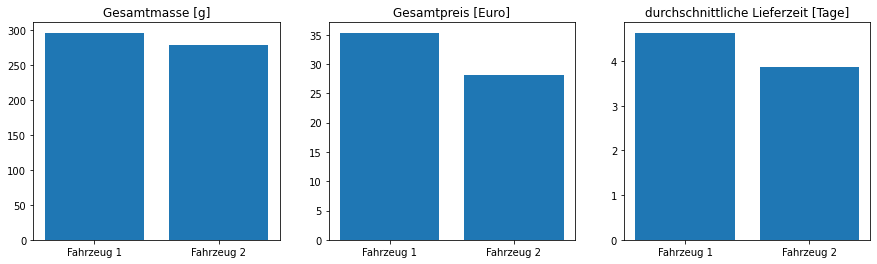

In [14]:
# plot the data, save diagramm as svg-file

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(["Fahrzeug 1", "Fahrzeug 2"], [Fahrzeug_1.properties["mass [g]"], 
                                             Fahrzeug_2.properties["mass [g]"]])
plt.title("Gesamtmasse [g]")

plt.subplot(1, 3, 2)
plt.bar(["Fahrzeug 1", "Fahrzeug 2"], [Fahrzeug_1.properties["price [Euro]"], 
                                             Fahrzeug_2.properties["price [Euro]"]])
plt.title("Gesamtpreis [Euro]")

plt.subplot(1, 3, 3)
plt.bar(["Fahrzeug 1", "Fahrzeug 2"], [Fahrzeug_1.properties["average delivery time [days]"], 
                                             Fahrzeug_2.properties["average delivery time [days]"]])
plt.title("durchschnittliche Lieferzeit [Tage]")

plt.savefig("KPI-Vergleich.svg")

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Das zweite Fahrzeug ist bezogen auf alle drei KPIs besser als das erste Fahrzeug. Obwohl ich nur versucht habe ein günstigeres Fahrzeug mit einer schnelleren durchschnittlichen Lieferzeit zu bauen, ist das Ergebnis sogar zusätzlich noch leichter geworden als das erste Fahrzeug. Ich konnte somit die gewünschte Verbesserung erzielen und konnte zeigen, das es möglich ist KPIs aus mehreren unterschiedlichen Qualitätsdimensionen gleichzeitig zu verbessern. Über die Qualität der beiden Fahrzeuge sagen die gewählten KPIs nicht viel aus. Ein leichteres Fahrzeug findet vermutlich mehr Akzeptanz, hat jedoch möglicherweise eine geringere Haftreibung. Ein geringerer Preis führt oft zu einer Qualitätsabnahme, was jedoch nicht der Fall sein muss, vorallem wenn das erste Fahrzeug wie in meinem Fall nicht optimiert ist. Hingegen wird durch einen geringeren Preis der Aufwand veringert, was besonders dem Verkäufer des Fahrzeugs hilft. Die durchschnittliche Lieferzeit der Teile erhöht die Verfügbarkeit des Fahrzeugs, hat aber vorallem auf den Verkäufer und weniger auf den Kunden einen Einfluss. Die KPIs tätigen Aussagen über verschiedene Qualitätsdimensionen, jedoch bräuchte man mehr KPIs um zu beurteilen wie gut das Fahrzeug seine Funktion erfüllt, also zum Beispiel wie schnell es fährt.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Findable: Die KPIs sind sehr gut auffindbar, dadurch, dass das Gesamtsystem und auch jede Komponente eindeutig durch eine uuid gekennzeichnet ist.

Accessible: Durch die uuid und dadurch, dass sich das Gesamtsystem in einer json-Datei befindet, kann jederzeit zum Beispiel mit Python auf die KPIs zugegriffen werden. Die KPIs sind somit Zugänglich.

Interoperable: Die KPIs sind in einer json-Datei gespeichert, die sowohl maschinen- als auch Menschlesbar ist. Somit  sind die KPIs interoperabel.

Reusable: Durch die in calculation_rules.py zur Verfügung gestellten Berechnungsvorschriften sind die KPIs gut dokumentiert. Sie sind somit wiederverwendbar.

Die KPIs erfüllen alle FAIR-Prinzipien und sind somit FAIR.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich fand das Projekt sehr interessant. Vorallem hat mir die Konstruktion der Fahrzeuge gefallen, auch mit dem Fokus darauf nur Teile zu verwenden, die zu meinen gewählten KPIs passen. Ich fand es aber auch sehr interessant die Fahrzeuge anschließend aus Komponenten aus json-Dateien zusammenzubauen, sodass ich am Ende Gesamtsysteme erhielt, welche ich schließlich wieder als json-Dateien speichern konnte. Dieses Arbeiten mit json-Dateien und das zusammenbauen der Komponenten über Python ist etwas, was ich davor noch nicht kannte. Außerdem habe ich die KPIs und die FAIR Prinzipien neu kennengelernt und konnte direkt an einem Beispiel erkennen wie man mit den beiden Dingen umgeht und was sie überhaupt bedeuten, da mir das vorallem bei den FAIR Prinzipien nicht direkt ersichtlich war. 